An analysis of the pollution levels of various cities/towns in Assam, India. 

In [168]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [169]:
# reading the .csv file
df = pd.read_csv('assam_pol.csv')

In [170]:
df.head()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
0,193,01-01-15,Assam,Guwahati,"Head Office, Bamunimaidan, Guwahati",Assam State Pollution Control Board,"Residential, Rural and other Areas",7.0,13.0,68,NaN
1,193,02-01-15,Assam,Guwahati,"Head Office, Bamunimaidan, Guwahati",Assam State Pollution Control Board,"Residential, Rural and other Areas",6.0,14.0,70,NaN
2,193,03-01-15,Assam,Guwahati,"Head Office, Bamunimaidan, Guwahati",Assam State Pollution Control Board,"Residential, Rural and other Areas",7.0,14.0,61,NaN
3,193,05-01-15,Assam,Guwahati,"Head Office, Bamunimaidan, Guwahati",Assam State Pollution Control Board,"Residential, Rural and other Areas",6.0,13.0,60,NaN
4,193,06-01-15,Assam,Guwahati,"Head Office, Bamunimaidan, Guwahati",Assam State Pollution Control Board,"Residential, Rural and other Areas",7.0,12.0,77,NaN


In [171]:
df.tail()

,Stn Code,Sampling Date,State,City/Town/Village/Area,Location of Monitoring Station,Agency,Type of Location,SO2,NO2,RSPM/PM10,PM 2.5
2812,607,11-12-15,Assam,Silcher,"Janiganj, Silcher",Assam State Pollution Control Board,"Residential, Rural and other Areas",6.0,16.0,95,NaN
2813,607,15-12-15,Assam,Silcher,"Janiganj, Silcher",Assam State Pollution Control Board,"Residential, Rural and other Areas",7.0,16.0,94,NaN
2814,607,18-12-15,Assam,Silcher,"Janiganj, Silcher",Assam State Pollution Control Board,"Residential, Rural and other Areas",8.0,16.0,97,NaN
2815,607,22-12-15,Assam,Silcher,"Janiganj, Silcher",Assam State Pollution Control Board,"Residential, Rural and other Areas",5.0,17.0,100,NaN
2816,607,25-12-15,Assam,Silcher,"Janiganj, Silcher",Assam State Pollution Control Board,"Residential, Rural and other Areas",7.0,17.0,102,NaN


The PM 2.5 column is empty for the first and last five rows. If it is empty for the entire data set, it can be removed.

In [172]:
df.describe()

,Stn Code,SO2,NO2,RSPM/PM10,PM 2.5
count,2817.000000,2815.000000,2816.000000,2817.000000,0.0
mean,534.691871,6.997513,14.211648,94.132055,NaN
std,111.888855,1.507501,2.983903,44.733495,NaN
min,193.000000,2.000000,6.000000,18.000000,NaN
25%,537.000000,NaN,NaN,66.000000,NaN
50%,566.000000,NaN,NaN,79.000000,NaN
75%,597.000000,NaN,NaN,115.000000,NaN
max,607.000000,14.000000,31.000000,358.000000,NaN


As seen , the PM 2.5 column is empty for the entire data set. Also , since this data set deals with just one state, the 'State' column can also be removed. The column 'Agency' is not relevant for analysis as it is the same throughout, so it can be removed as well

In [173]:
df.drop(['Agency','PM 2.5','State'],axis=1,inplace=True)

In [174]:
df.head()

,Stn Code,Sampling Date,City/Town/Village/Area,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10
0,193,01-01-15,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",7.0,13.0,68
1,193,02-01-15,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",6.0,14.0,70
2,193,03-01-15,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",7.0,14.0,61
3,193,05-01-15,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",6.0,13.0,60
4,193,06-01-15,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",7.0,12.0,77


Columns are now to be made readable by Pandas

In [175]:
df['Sampling Date']=pd.to_datetime(df['Sampling Date'],format="%d-%m-%y",dayfirst=True)

In [176]:
df.head()

,Stn Code,Sampling Date,City/Town/Village/Area,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10
0,193,2015-01-01,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",7.0,13.0,68
1,193,2015-01-02,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",6.0,14.0,70
2,193,2015-01-03,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",7.0,14.0,61
3,193,2015-01-05,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",6.0,13.0,60
4,193,2015-01-06,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",7.0,12.0,77


In [177]:
df.tail()

,Stn Code,Sampling Date,City/Town/Village/Area,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10
2812,607,2015-12-11,Silcher,"Janiganj, Silcher","Residential, Rural and other Areas",6.0,16.0,95
2813,607,2015-12-15,Silcher,"Janiganj, Silcher","Residential, Rural and other Areas",7.0,16.0,94
2814,607,2015-12-18,Silcher,"Janiganj, Silcher","Residential, Rural and other Areas",8.0,16.0,97
2815,607,2015-12-22,Silcher,"Janiganj, Silcher","Residential, Rural and other Areas",5.0,17.0,100
2816,607,2015-12-25,Silcher,"Janiganj, Silcher","Residential, Rural and other Areas",7.0,17.0,102


In [178]:
#converting the dates in the Sampling Date column into months name
df['Month'] = df['Sampling Date'].dt.strftime('%b')
df.head(2)

,Stn Code,Sampling Date,City/Town/Village/Area,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10,Month
0,193,2015-01-01,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",7.0,13.0,68,Jan
1,193,2015-01-02,Guwahati,"Head Office, Bamunimaidan, Guwahati","Residential, Rural and other Areas",6.0,14.0,70,Jan


Checking the mean SO2 level of the different cities throughout the year

In [179]:
x = df.groupby('City/Town/Village/Area')['SO2','NO2'].mean()
x

,SO2,NO2
City/Town/Village/Area,,
Bongaigaon,7.058824,13.914439
Daranga,5.725000,12.087500
Dibrugarh,7.530612,14.877551
Golaghat,7.052083,13.876289
Guwahati,7.150038,14.345773
Lakhimpur,6.552083,14.177083
Margherita,7.516129,15.021505
Nagaon,8.407895,15.236842
Nalbari,6.228571,15.495238


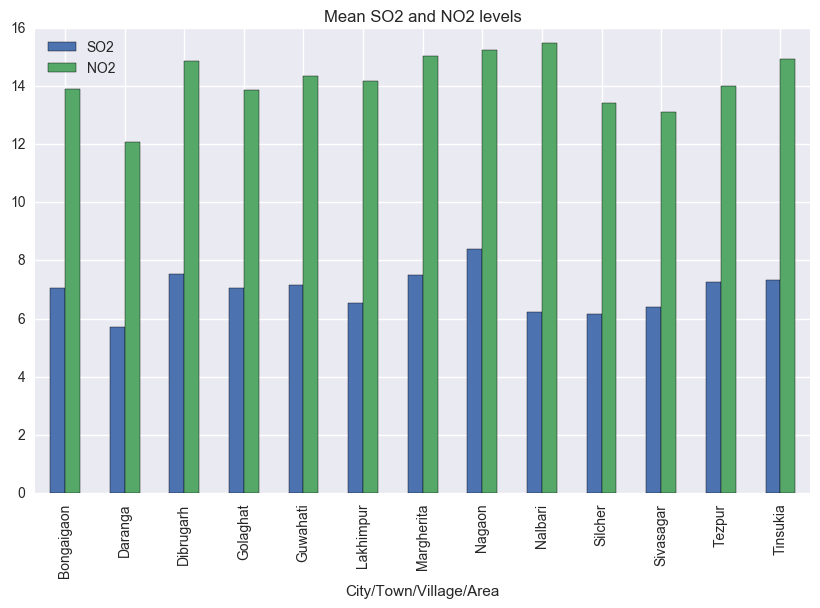

In [183]:
x.plot(kind='bar',figsize=(10,6),title='Mean SO2 and NO2 levels')

Interesting to note that the city Nagaon has a higher SO2 and NO2 level than Guwahati. Let's check if this is true for RSPM/PM10 

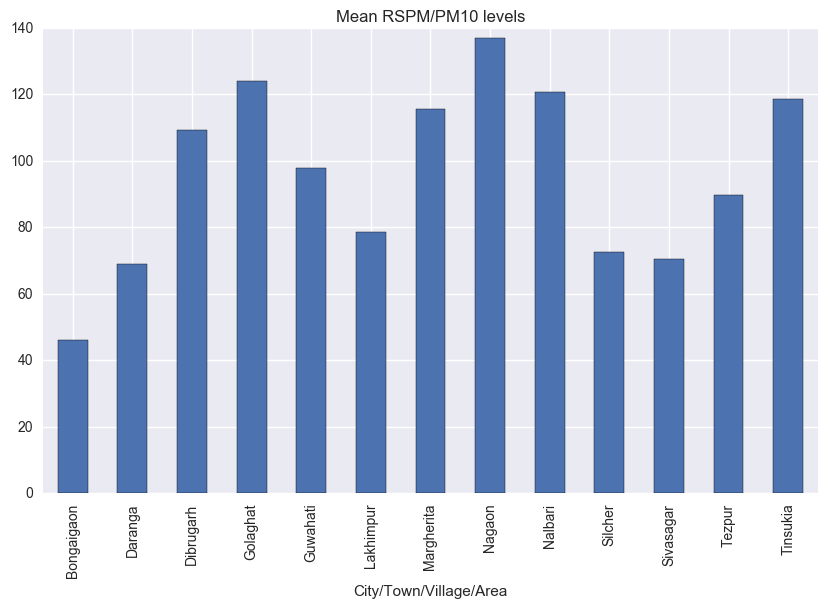

In [182]:
df.groupby('City/Town/Village/Area')['RSPM/PM10'].mean().plot(kind='bar',figsize=(10,6),title='Mean RSPM/PM10 levels')

The RSPM/PM10 is considerably higher in Nagaon than rest of the state. Interesting to note that the city of Guwahati has lower pollution level than many other cities/towns

Now, grouping pollution data by cities and months

In [64]:
x=df.groupby(['City/Town/Village/Area','Month'])['SO2','NO2','RSPM/PM10'].mean()
x

SO2        NO2   RSPM/PM10
City/Town/Village/Area Month                                 
Bongaigaon             Apr    6.947368  14.631579   42.000000
                       Aug    6.705882  12.647059   32.647059
                       Dec    5.937500  12.875000   79.250000
                       Feb    7.500000  14.062500   39.562500
                       Jan    7.250000  14.000000   36.875000
                       Jul    6.722222  12.944444   35.500000
                       Jun    6.222222  13.111111   34.666667
                       Mar    8.375000  15.562500   44.875000
                       May    6.937500  14.187500   41.562500
                       Nov    6.400000  15.100000   72.900000
                       Oct    8.600000  15.133333   61.133333
                       Sep    7.222222  13.500000   41.777778
Daranga                Apr    7.333333  15.666667  137.000000
                       Aug    3.500000  11.375000   39.875000
                       Dec    6.250000  12.625000   71.125000
                       Feb    6.250000  13.500000   74.000000
                       Jan    6.333333  13.666667   57.833333
                       Jul    4.875000   7.625000   41.875000
                       Jun    6.500000  10.250000   38.750000
                       Mar    7.000000  14.142857  112.000000
                       May    5.571429  12.000000   53.500000
                       Nov    6.625000  11.875000   74.250000
                       Oct    5.250000  12.000000   73.250000
                       Sep    4.166667  11.500000   59.666667
Dibrugarh              Apr    8.285714  15.714286  139.142857
                       Aug    7.250000  13.375000  105.375000
                       Dec    8.333333  22.111111  127.444444
                       Feb    7.000000  13.375000   94.625000
                       Jan    6.875000  13.625000   62.500000
                       Jul    7.125000  13.875000  123.500000
...                                ...        ...         ...
Sivasagar              Jun    5.071429  11.714286   62.000000
                       Mar    7.722222  14.055556   83.833333
                       May    5.937500  12.000000   72.750000
                       Nov    7.411765  16.294118   79.882353
                       Oct    6.352941  12.764706   57.823529
                       Sep    5.444444  11.388889   60.666667
Tezpur                 Apr    7.222222  14.777778  163.666667
                       Aug    6.555556  12.666667   36.111111
                       Dec    8.555556  17.111111  102.000000
                       Feb    7.250000  13.500000  122.625000
                       Jan    6.500000  13.250000   66.500000
                       Jul    6.444444  12.555556   57.000000
                       Jun    6.333333  12.222222   49.111111
                       Mar    8.777778  15.000000  177.000000
                       May    6.625000  13.375000  157.625000
                       Nov    8.375000  16.875000   64.750000
                       Oct    7.500000  14.125000   49.875000
                       Sep    6.888889  12.777778   32.666667
Tinsukia               Apr    8.714286  16.285714  145.857143
                       Aug    6.000000  12.400000  109.200000
                       Dec    8.000000  20.058824  148.294118
                       Feb    7.538462  14.307692   96.076923
                       Jan    7.187500  13.750000   62.187500
                       Jul    6.571429  13.642857  116.285714
                       Jun    7.076923  13.923077  116.846154
                       Mar    8.846154  15.692308  175.692308
                       May    7.000000  14.266667  100.200000
                       Nov    8.466667  16.800000  127.933333
                       Oct    6.750000  13.562500  127.000000
                       Sep    6.058824  13.823529  105.058824

[154 rows x 3 columns]

The most and least polluted city/town can be found out by adding the three paramters and finding the maximum and minimum among them.

In [71]:
x['Total']=x['SO2'] + x['NO2'] + x['RSPM/PM10']
x.head(15)

SO2        NO2   RSPM/PM10       Total
City/Town/Village/Area Month                                             
Bongaigaon             Apr    6.947368  14.631579   42.000000   63.578947
                       Aug    6.705882  12.647059   32.647059   52.000000
                       Dec    5.937500  12.875000   79.250000   98.062500
                       Feb    7.500000  14.062500   39.562500   61.125000
                       Jan    7.250000  14.000000   36.875000   58.125000
                       Jul    6.722222  12.944444   35.500000   55.166667
                       Jun    6.222222  13.111111   34.666667   54.000000
                       Mar    8.375000  15.562500   44.875000   68.812500
                       May    6.937500  14.187500   41.562500   62.687500
                       Nov    6.400000  15.100000   72.900000   94.400000
                       Oct    8.600000  15.133333   61.133333   84.866667
                       Sep    7.222222  13.500000   41.777778   62.500000
Daranga                Apr    7.333333  15.666667  137.000000  160.000000
                       Aug    3.500000  11.375000   39.875000   54.750000
                       Dec    6.250000  12.625000   71.125000   90.000000

In [70]:
x.loc[x['Total'].idxmax()]

SO2            9.25
NO2           17.00
RSPM/PM10    218.50
Total        244.75
Name: (Nagaon, Apr), dtype: float64

In [68]:
x.loc[x['Total'].idxmin()]

SO2           6.705882
NO2          12.647059
RSPM/PM10    32.647059
Total        52.000000
Name: (Bongaigaon, Aug), dtype: float64

Nagaon, having the highest levels of NO2 and SO2 , as well as RSPM/PM10 levels has its pollution level at peak in the month of April. April tends to be the worst month for the city due to very high levels of respirable suspended particulate matter and other small particulate mater (RSPM/PM10)

Looking at the levels throughout the year, the town of Bonaigaon was the cleanest in the month of August.

Plotting graphs of the variations in the RSPM/PM10 levels on a monthly basis might help understand the data better.

In [142]:
nagaon = df['City/Town/Village/Area'] == 'Nagaon'

In [143]:
nagaon_df = df[nagaon]
nagaon_df.head()

,Stn Code,Sampling Date,City/Town/Village/Area,Location of Monitoring Station,Type of Location,SO2,NO2,RSPM/PM10,Month
1791,595,2015-01-01,Nagaon,"Water Resources Division Office Campus, Christ...","Residential, Rural and other Areas",7.0,13.0,56,Jan
1792,595,2015-01-05,Nagaon,"Water Resources Division Office Campus, Christ...","Residential, Rural and other Areas",7.0,14.0,69,Jan
1793,595,2015-01-07,Nagaon,"Water Resources Division Office Campus, Christ...","Residential, Rural and other Areas",7.0,13.0,66,Jan
1794,595,2015-01-12,Nagaon,"Water Resources Division Office Campus, Christ...","Residential, Rural and other Areas",7.0,13.0,63,Jan
1795,595,2015-01-16,Nagaon,"Water Resources Division Office Campus, Christ...","Residential, Rural and other Areas",7.0,13.0,65,Jan


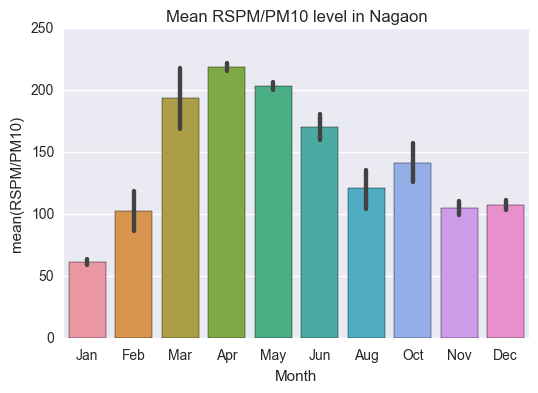

In [161]:
ax = sns.barplot(x='Month',y='RSPM/PM10',data=nagaon_df).set_title('Mean RSPM/PM10 level in Nagaon')

It is seen that the highest level of RSPM/PM10 is in the months of March and April. Now, to check if that is true for the cleanest town Bongaigaon and the cities of Guwahati and Silcher, which are the two biggiest cities in the State:

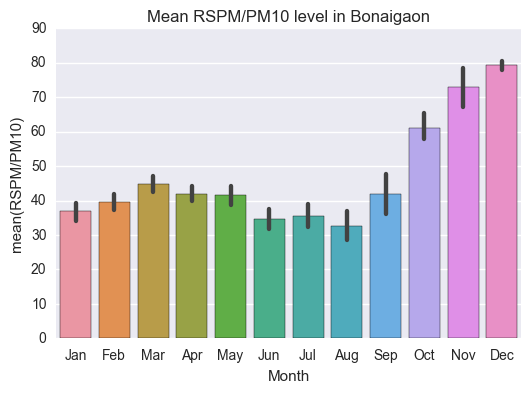

In [180]:
sns.barplot(x='Month',y='RSPM/PM10',data=df[df['City/Town/Village/Area']=='Bongaigaon']).set_title('Mean RSPM/PM10 level in Bonaigaon')

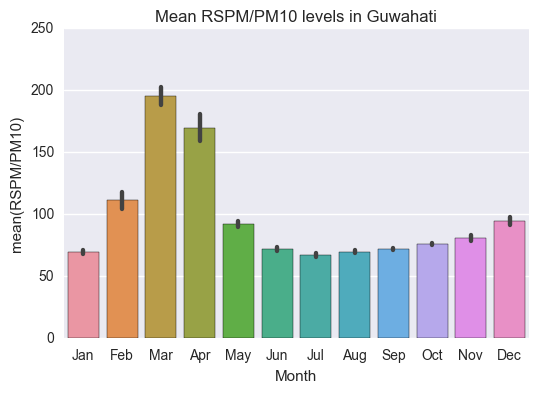

In [159]:
sns.barplot(x='Month',y='RSPM/PM10',data=df[df['City/Town/Village/Area']=='Guwahati']).set_title('Mean RSPM/PM10 levels in Guwahati')

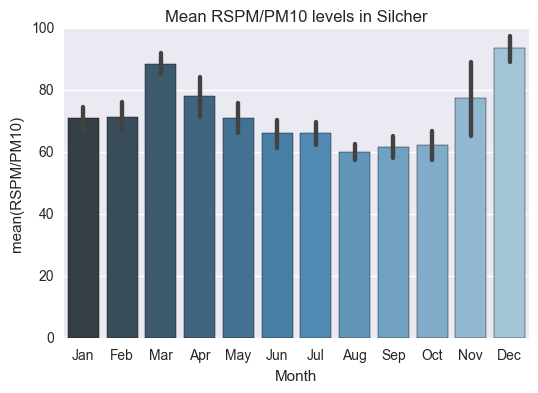

In [166]:
sns.barplot(x='Month',y='RSPM/PM10',data=df[df['City/Town/Village/Area']=='Silcher'],palette='Blues_d').set_title('Mean RSPM/PM10 levels in Silcher')

It is seen that the cities of Nagaon, Guwahati and Silcher follows almost the same trend , i.e high level of RSPM/PM10 in the months of March and April.
Bongaigaon being the least polluted town has low levels of RSPM/PM10 even in the months of March and April.